In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



## Lets load the Boston House Pricing Dataset

In [1]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(data_id=42165, as_frame=True)
X = boston.data
y = boston.target






In [2]:
boston.keys()






dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
## Lets check the description of the dataset
print(boston.DESCR)



Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [4]:
print(boston.data)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [10]:
boston



{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
 1        2          20       RL         80.0     9600   Pave   NaN      Reg   
 2        3          60       RL         68.0    11250   Pave   NaN      IR1   
 3        4          70       RL         60.0     9550   Pave   NaN      IR1   
 4        5          60       RL         84.0    14260   Pave   NaN      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
 1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
 1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
 1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
 1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
 
      LandContour Utilities  .

In [5]:
print(boston.target)



0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [6]:
print(boston.feature_names)



['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

## Preparing The Dataset

In [24]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [25]:
dataset.head()





,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [26]:
dataset['Price']=boston.target



In [27]:
dataset.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
## Summarizing The Stats of the data
dataset.describe()





,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
dataset = dataset.select_dtypes(exclude=['object', 'float64'])

dataset





,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [31]:
# Retain 10 columns and the 'Price' column
columns_to_retain = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 
                     'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'Price']

# Drop other columns
dataset = dataset[columns_to_retain]
dataset.head()



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces,Price
0,7,1710,2,856,2,2003,2003,856,8,0,208500
1,6,1262,2,1262,2,1976,1976,1262,6,1,181500
2,7,1786,2,920,2,2001,2002,920,6,1,223500
3,7,1717,3,756,1,1915,1970,961,7,1,140000
4,8,2198,3,1145,2,2000,2000,1145,9,1,250000


In [32]:
dataset



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces,Price
0,7,1710,2,856,2,2003,2003,856,8,0,208500
1,6,1262,2,1262,2,1976,1976,1262,6,1,181500
2,7,1786,2,920,2,2001,2002,920,6,1,223500
3,7,1717,3,756,1,1915,1970,961,7,1,140000
4,8,2198,3,1145,2,2000,2000,1145,9,1,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,2000,953,7,1,175000
1456,6,2073,2,1542,2,1978,1988,2073,7,2,210000
1457,7,2340,1,1152,2,1941,2006,1188,9,2,266500
1458,5,1078,1,1078,1,1950,1996,1078,5,0,142125


In [33]:
text= pd.DataFrame(dataset.isnull().sum()
                   )


missing_values = text[text[0] > 0]
print("Columns with missing values and their counts:")
print(missing_values)
# Filling missing values using interpolation
dataset.interpolate(method='linear', inplace=True)




Columns with missing values and their counts:
Empty DataFrame
Columns: [0]
Index: []


C:\Users\tembh\AppData\Local\Temp\ipykernel_3584\453276145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.interpolate(method='linear', inplace=True)


In [34]:
dataset.isnull().sum()


OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
TotRmsAbvGrd    0
Fireplaces      0
Price           0
dtype: int64

In [35]:
dataset.corr()



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces,Price
OverallQual,1.000000,0.593007,0.600671,0.537808,0.550600,0.572323,0.550684,0.476224,0.427452,0.396765,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.454868,0.630012,0.199010,0.287389,0.566024,0.825489,0.461679,0.708624
GarageCars,0.600671,0.467247,1.000000,0.434585,0.469672,0.537850,0.420622,0.439317,0.362289,0.300789,0.640409
TotalBsmtSF,0.537808,0.454868,0.434585,1.000000,0.323722,0.391452,0.291066,0.819530,0.285573,0.339519,0.613581
FullBath,0.550600,0.630012,0.469672,0.323722,1.000000,0.468271,0.439046,0.380637,0.554784,0.243671,0.560664
YearBuilt,0.572323,0.199010,0.537850,0.391452,0.468271,1.000000,0.592855,0.281986,0.095589,0.147716,0.522897
YearRemodAdd,0.550684,0.287389,0.420622,0.291066,0.439046,0.592855,1.000000,0.240379,0.191740,0.112581,0.507101
1stFlrSF,0.476224,0.566024,0.439317,0.819530,0.380637,0.281986,0.240379,1.000000,0.409516,0.410531,0.605852
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.285573,0.554784,0.095589,0.191740,0.409516,1.000000,0.326114,0.533723
Fireplaces,0.396765,0.461679,0.300789,0.339519,0.243671,0.147716,0.112581,0.410531,0.326114,1.000000,0.466929


## Analyzing The Correlated Features

In [39]:
dataset.corr()



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces,Price
OverallQual,1.000000,0.593007,0.600671,0.537808,0.550600,0.572323,0.550684,0.476224,0.427452,0.396765,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.454868,0.630012,0.199010,0.287389,0.566024,0.825489,0.461679,0.708624
GarageCars,0.600671,0.467247,1.000000,0.434585,0.469672,0.537850,0.420622,0.439317,0.362289,0.300789,0.640409
TotalBsmtSF,0.537808,0.454868,0.434585,1.000000,0.323722,0.391452,0.291066,0.819530,0.285573,0.339519,0.613581
FullBath,0.550600,0.630012,0.469672,0.323722,1.000000,0.468271,0.439046,0.380637,0.554784,0.243671,0.560664
YearBuilt,0.572323,0.199010,0.537850,0.391452,0.468271,1.000000,0.592855,0.281986,0.095589,0.147716,0.522897
YearRemodAdd,0.550684,0.287389,0.420622,0.291066,0.439046,0.592855,1.000000,0.240379,0.191740,0.112581,0.507101
1stFlrSF,0.476224,0.566024,0.439317,0.819530,0.380637,0.281986,0.240379,1.000000,0.409516,0.410531,0.605852
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.285573,0.554784,0.095589,0.191740,0.409516,1.000000,0.326114,0.533723
Fireplaces,0.396765,0.461679,0.300789,0.339519,0.243671,0.147716,0.112581,0.410531,0.326114,1.000000,0.466929


Text(0, 0.5, 'Price')

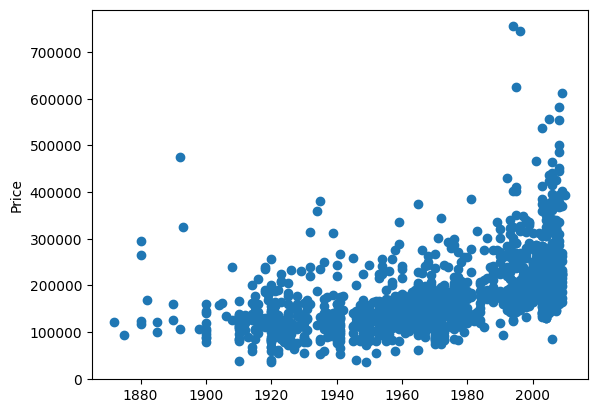

In [41]:
plt.scatter(dataset['YearBuilt'],dataset['Price'])
plt.xlabel('')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

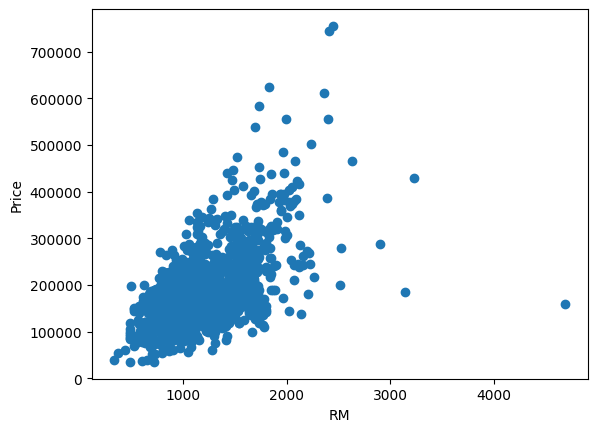

In [42]:
plt.scatter(dataset['1stFlrSF'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='1stFlrSF', ylabel='Price'>

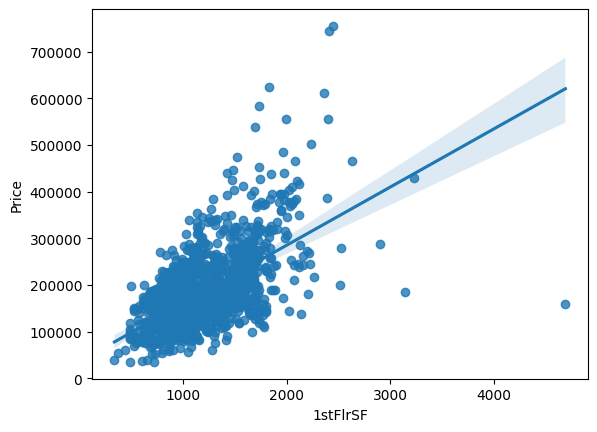

In [43]:
import seaborn as sns
sns.regplot(x="1stFlrSF",y="Price",data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

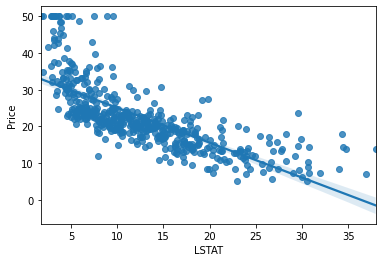

In [22]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

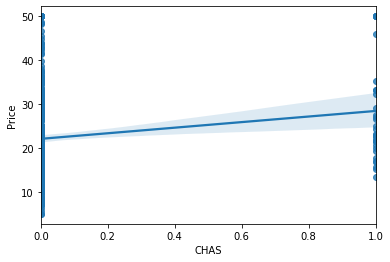

In [23]:
sns.regplot(x="CHAS",y="Price",data=dataset)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

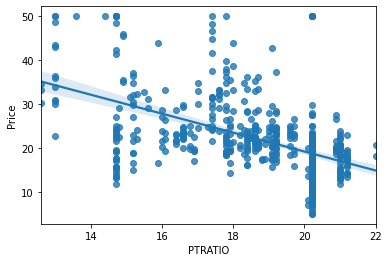

In [24]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

In [44]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]



In [45]:
X.head()



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces
0,7,1710,2,856,2,2003,2003,856,8,0
1,6,1262,2,1262,2,1976,1976,1262,6,1
2,7,1786,2,920,2,2001,2002,920,6,1
3,7,1717,3,756,1,1915,1970,961,7,1
4,8,2198,3,1145,2,2000,2000,1145,9,1


In [46]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1460, dtype: int64

In [47]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
X_train



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces
135,7,1682,2,1304,2,1970,1970,1682,7,1
1452,5,1072,2,547,1,2005,2005,1072,5,0
762,7,1547,2,756,2,2009,2009,764,7,0
932,9,1905,3,1905,2,2006,2006,1905,8,1
435,7,1661,2,799,2,1996,1996,827,6,1
...,...,...,...,...,...,...,...,...,...,...
1095,6,1314,2,1314,2,2006,2006,1314,6,1
1130,4,1981,2,1122,2,1928,1950,1328,7,2
1294,5,864,2,864,1,1955,1990,864,5,0
860,7,1426,1,912,1,1918,1998,912,7,1


In [49]:
X_test



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces
892,6,1068,1,1059,1,1963,2003,1068,6,0
1105,8,2622,2,1463,2,1994,1995,1500,9,2
413,5,1028,2,1008,1,1927,1950,1028,5,1
522,6,1664,2,1004,2,1947,1950,1004,7,2
1036,9,1620,3,1620,2,2007,2008,1620,6,1
...,...,...,...,...,...,...,...,...,...,...
331,5,1056,1,1056,1,1958,1992,1056,6,0
323,3,1163,1,1162,1,1955,2005,1163,6,0
650,7,1665,2,813,2,2007,2007,822,7,0
439,6,1196,2,684,1,1920,2000,684,7,0


In [50]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [51]:
X_train=scaler.fit_transform(X_train)

In [52]:
X_test=scaler.transform(X_test)

In [53]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [54]:
X_train

array([[ 0.63603069,  0.28783473,  0.29606343, ...,  1.3156523 ,
         0.27923396,  0.59424033],
       [-0.82305655, -0.86156463,  0.29606343, ..., -0.25102167,
        -0.94819445, -0.9432625 ],
       [ 0.63603069,  0.03345946,  0.29606343, ..., -1.04206361,
         0.27923396, -0.9432625 ],
       ...,
       [-0.82305655, -1.25349097,  0.29606343, ..., -0.78523181,
        -0.94819445, -0.9432625 ],
       [ 0.63603069, -0.19453615, -1.07306249, ..., -0.66195255,
         0.27923396,  0.59424033],
       [ 0.63603069,  0.04853355,  1.66518936, ...,  0.98947592,
         0.27923396,  0.59424033]])

In [55]:
X_test

array([[-0.09351293, -0.86910167, -1.07306249, ..., -0.26129494,
        -0.33448024, -0.9432625 ],
       [ 1.36557431,  2.05904031,  0.29606343, ...,  0.84821843,
         1.50666236,  2.13174316],
       [-0.82305655, -0.94447212,  0.29606343, ..., -0.36402766,
        -0.94819445,  0.59424033],
       ...,
       [ 0.63603069,  0.25580229,  0.29606343, ..., -0.89310117,
         0.27923396, -0.9432625 ],
       [-0.09351293, -0.62791623,  0.29606343, ..., -1.24752905,
         0.27923396, -0.9432625 ],
       [ 2.09511793,  3.03508763,  1.66518936, ...,  2.04505461,
         2.73409076,  2.13174316]])

## Model Training

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regression=LinearRegression()

In [58]:
regression.fit(X_train,y_train)

LinearRegression()

In [59]:
## print the coefficients and the intercept
print(regression.coef_)



[25141.75159416 22098.72136881 11503.20579228  6122.70066516
 -3052.0977982   8914.43526789  7144.53975897  4356.34898091
  1547.7405945   7075.29368526]


In [61]:
print(regression.intercept_)


181312.69275929546


In [62]:
## on which parameters the model has been trained
regression.get_params()




{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [63]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)



In [64]:
reg_pred




array([146303.29711776, 299041.94231123, 122125.56334362, 179597.17383289,
       289424.06652877,  53938.09930925, 232214.73243031, 174989.3123138 ,
        52668.92894192, 119016.13542518, 153685.27657304, 103484.64154212,
        84943.13934213, 218913.43928254, 200679.1034323 , 122226.41458129,
       220450.23618428, 129562.40371671, 122847.23905202, 214444.24444834,
       187961.2447727 , 222499.32328466, 179166.71695241, 114340.25349064,
       208119.07396797, 169587.20867834, 207142.49845378,  88625.8732818 ,
       195320.0952378 , 217579.09037964, 121259.74080103, 254454.42928431,
       207303.1727121 ,  81903.16101635, 272889.01112035, 148366.14361244,
       155516.92892342, 229945.2809123 , 296269.21483599,  83513.30455509,
       144609.8552727 , 250680.93763019, 110580.77500136, 301687.53578426,
       122511.99409489, 148344.43140261, 103610.94503028, 108690.31600298,
       342608.93097857, 126241.28781545,  99198.69219339, 205669.51901048,
       125293.5728176 , 3

## Assumptions

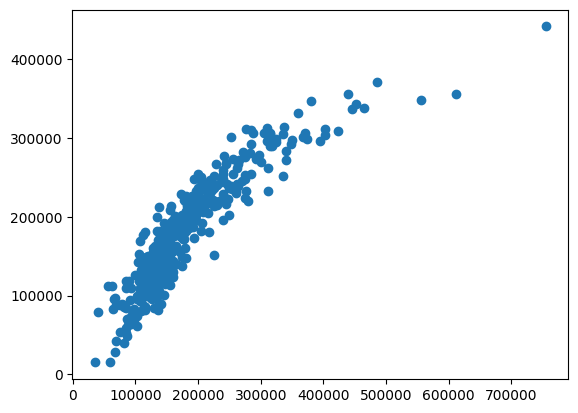

In [65]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)



In [66]:
## Residuals
residuals=y_test-reg_pred




In [67]:
residuals



892       8196.702882
1105     25958.057689
413      -7125.563344
522     -20597.173833
1036     26075.933471
            ...      
331      16953.835960
323      30100.217612
650      -2664.469383
439     -35395.976516
798     113569.680403
Name: Price, Length: 438, dtype: float64

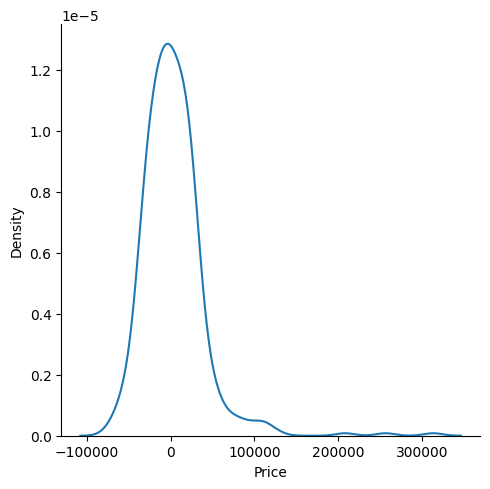

In [68]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

# most pf the doiff are betwen -100000 and 100000

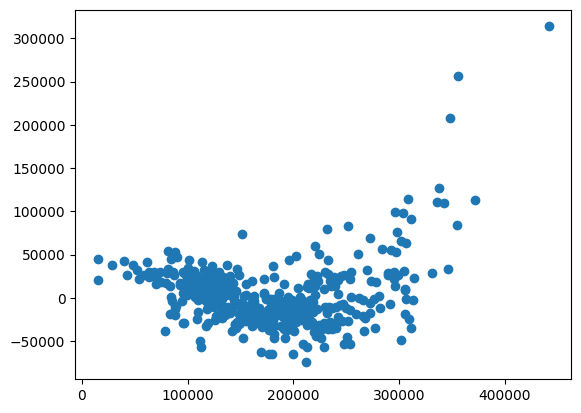

In [69]:
## Scatter plot with respect to prediction and residuals
## SUUMPTIOMS: THERE SHOULD BE uniform distribution
plt.scatter(reg_pred,residuals)



In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))



24756.537159703214
1388912243.9148674
37268.11296423348


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

#80 % is good score for the model


0.8009610802753231


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [72]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7962997472606936

## New Data Prediction

In [86]:
boston.data[:1].to_numpy().reshape(1, -1)


## THERE SHOULD BE LINEARITY BETWEEN THE FEATURES AND THE TARGET VARIABLE
# Checking linearity between features and target variable using scatter plots


array([[1, 60, 'RL', 65.0, 8450, 'Pave', nan, 'Reg', 'Lvl', 'AllPub',
        'Inside', 'Gtl', 'CollgCr', 'Norm', 'Norm', '1Fam', '2Story', 7,
        5, 2003, 2003, 'Gable', 'CompShg', 'VinylSd', 'VinylSd',
        'BrkFace', 196.0, 'Gd', 'TA', 'PConc', 'Gd', 'TA', 'No', 'GLQ',
        706, 'Unf', 0, 150, 856, 'GasA', 'Ex', 'Y', 'SBrkr', 856, 854, 0,
        1710, 1, 0, 2, 1, 3, 1, 'Gd', 8, 'Typ', 0, nan, 'Attchd', 2003.0,
        'RFn', 2, 548, 'TA', 'TA', 'Y', 0, 61, 0, 0, 0, 0, nan, nan, nan,
        0, 2, 2008, 'WD', 'Normal']], dtype=object)

In [87]:
boston.data[:1]





,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [92]:
## Transformation of new data excluding the last feature
scaler.transform(dataset.iloc[:1, :-1].to_numpy().reshape(1, -1))

c:\Desktop\ai\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.63603069,  0.34059405,  0.29606343, -0.45564861,  0.76784032,
         1.04135918,  0.87971741, -0.80577836,  0.89294816, -0.9432625 ]])

In [93]:
regression.predict(scaler.transform(dataset.iloc[:1, :-1].to_numpy().reshape(1, -1)))

c:\Desktop\ai\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([209868.91237754])

## Pickling The Model file For Deployment

In [74]:
import pickle



In [75]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [76]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [94]:
## Prediction
pickled_model.predict(scaler.transform(dataset.iloc[:1, :-1].to_numpy().reshape(1, -1)))

c:\Desktop\ai\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([209868.91237754])

In [95]:
dataset


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,Fireplaces,Price
0,7,1710,2,856,2,2003,2003,856,8,0,208500
1,6,1262,2,1262,2,1976,1976,1262,6,1,181500
2,7,1786,2,920,2,2001,2002,920,6,1,223500
3,7,1717,3,756,1,1915,1970,961,7,1,140000
4,8,2198,3,1145,2,2000,2000,1145,9,1,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,2000,953,7,1,175000
1456,6,2073,2,1542,2,1978,1988,2073,7,2,210000
1457,7,2340,1,1152,2,1941,2006,1188,9,2,266500
1458,5,1078,1,1078,1,1950,1996,1078,5,0,142125


In [96]:
dataset.to_csv('boston.csv',index=False)


In [97]:
dataset.to_parquet('boston.parquet',index=False)



In [98]:
dataset.columns.to_list()


['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'Price']